In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
df=pd.read_csv('dataset_group.csv')

In [3]:
df.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [4]:
df.tail()

,Date,Order_id,Product
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent
20640,26-02-2020,1139,shampoo


In [5]:
df.shape

(20641, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [7]:
df.describe(include="all")

,Date,Order_id,Product
count,20641,20641.000000,20641
unique,603,NaN,37
top,08-02-2019,NaN,poultry
freq,183,NaN,640
mean,NaN,575.986289,NaN
std,NaN,328.557078,NaN
min,NaN,1.000000,NaN
25%,NaN,292.000000,NaN
50%,NaN,581.000000,NaN
75%,NaN,862.000000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [9]:
df.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [10]:
df.duplicated().sum()

4730

In [11]:
df['Product'] = df['Product'].str.lower()

In [12]:
df

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
...,...,...,...
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent


In [13]:
df = df.drop(df[df.Product == 'none'].index)

In [14]:
df

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
...,...,...,...
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent


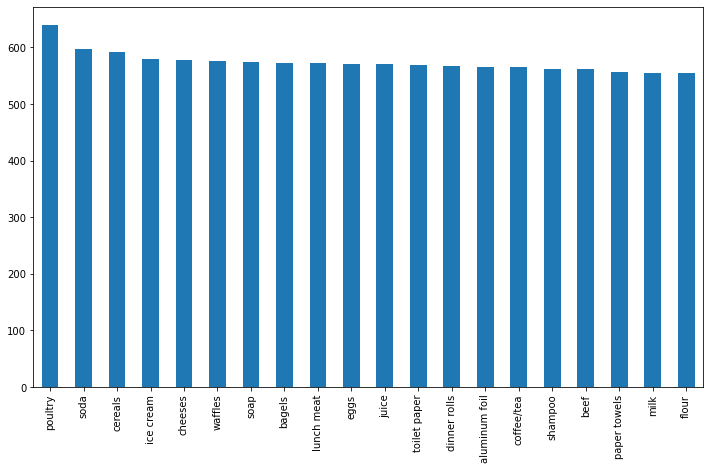

In [15]:
df['Product'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(12,7));

In [16]:
basket=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [17]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [18]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [19]:
basket=basket.applymap(encode_zero_one)

In [20]:
itemsets = apriori(basket, min_support = 0.05, use_colnames = True, low_memory=True)
itemsets

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
8449,0.051800,"(dinner rolls, poultry, ice cream, spaghetti s..."
8450,0.051800,"(dinner rolls, poultry, juice, spaghetti sauce)"
8451,0.053556,"(laundry detergent, dinner rolls, poultry, spa..."
8452,0.050044,"(laundry detergent, mixes, poultry, dishwashin..."


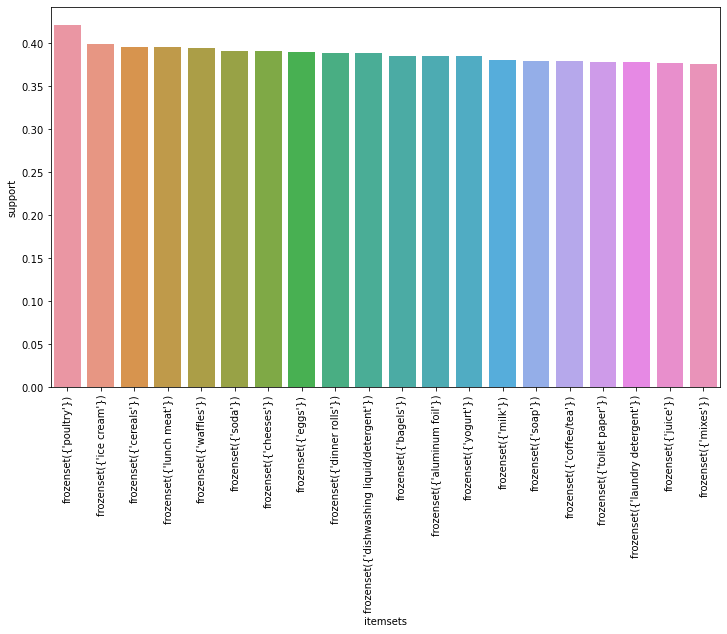

In [21]:
plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,1],
            itemsets.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show()

In [22]:
basket = association_rules(itemsets, metric ="lift") 
basket = basket.sort_values(['lift','confidence'], ascending =[False, False])

In [23]:
basket.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47952,"(pasta, paper towels)","(eggs, ice cream)",0.164179,0.166813,0.055312,0.336898,2.019617,0.027924,1.256500
47949,"(eggs, ice cream)","(pasta, paper towels)",0.166813,0.164179,0.055312,0.331579,2.019617,0.027924,1.250441
47951,"(pasta, ice cream)","(eggs, paper towels)",0.167691,0.165935,0.055312,0.329843,1.987784,0.027486,1.244581
47950,"(eggs, paper towels)","(pasta, ice cream)",0.165935,0.167691,0.055312,0.333333,1.987784,0.027486,1.248464
47854,"(dinner rolls, paper towels)","(eggs, pasta)",0.155399,0.169447,0.051800,0.333333,1.967185,0.025468,1.245830
47851,"(eggs, pasta)","(dinner rolls, paper towels)",0.169447,0.155399,0.051800,0.305699,1.967185,0.025468,1.216477
47910,"(poultry, spaghetti sauce)","(dinner rolls, juice)",0.171203,0.157155,0.051800,0.302564,1.925254,0.024894,1.208490
47907,"(dinner rolls, juice)","(poultry, spaghetti sauce)",0.157155,0.171203,0.051800,0.329609,1.925254,0.024894,1.236289
47797,"(cereals, sandwich bags)","(cheeses, bagels)",0.158033,0.167691,0.050922,0.322222,1.921524,0.024421,1.227997
47796,"(cheeses, bagels)","(cereals, sandwich bags)",0.167691,0.158033,0.050922,0.303665,1.921524,0.024421,1.209140
